## Programming model

#### Babylonian method square root
Compute $\sqrt{x}$.
##### How?
Continue $ s \leftarrow (s + x /s) / 2 $ till $ s \rightarrow \sqrt{x}$.

In [6]:
### Python routine for implementation of Babylonian apporach

import numpy as np

def babylon(x, N):
    s = (1.0 + x)/2.0
    for i in range(1, N):
        s = (s + x/s) / 2.0
    return s

x = 2.0
print(f"Sqrt from Babylonian Approach: {babylon(x, 10)}")
print(f"Sqrt from NumPy Approach is: {np.sqrt(x)}")

Sqrt from Babylonian Approach: 1.414213562373095
Sqrt from NumPy Approach is: 1.4142135623730951


In [8]:
### Python routine for differentiations of Babylonian routine

def diff_babylonian(x, N):
    s = (1.0 + x)/2.0
    s_prime = 1.0/ 2.0
    for i in range(1, N):
        s = (s + x/s) / 2.0
        s_prime = (1/2.0)*(s_prime + (s - x * s_prime)/(s**2))
    return s, s_prime

s, s_prime = diff_babylonian(2, 10)

print(f"value of sqrt(x) is : {s}")
print(f"Derivative of sqrt(x) is: {s_prime}")
print(f"Analytical derivative of sqrt(x) is: {0.5 *1/np.sqrt(2)}")


value of sqrt(x) is : 1.414213562373095
Derivative of sqrt(x) is: 0.35355339059327373
Analytical derivative of sqrt(x) is: 0.35355339059327373


In [9]:
!pip install sympy

You should consider upgrading via the '/Users/raj/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [10]:
import sympy as sp
x = sp.symbols("x")

# Symbolic for Function Evaluation
print("Symbolic for Function Evaluation")
for i in range(0, 5):
    print(sp.simplify(babylon(x, i)))

print("***********+++++++***********")
print("***********+++++++***********")
print("***********+++++++***********")
print("Symbolic for Derivative Evaluation")
for j in range(0, 5):
    print(sp.simplify(sp.simplify(sp.diff(babylon(x, i)))))

Symbolic for Function Evaluation
0.5*x + 0.5
0.5*x + 0.5
0.25*x + 1.0*x/(x + 1) + 0.25
(0.015625*x**4 + 0.4375*x**3 + 1.09375*x**2 + 0.4375*x + 0.015625)/(0.125*x**3 + 0.875*x**2 + 0.875*x + 0.125)
(6.103515625e-5*x**8 + 0.00732421875*x**7 + 0.111083984375*x**6 + 0.48876953125*x**5 + 0.7855224609375*x**4 + 0.48876953125*x**3 + 0.111083984375*x**2 + 0.00732421875*x + 6.103515625e-5)/(0.0009765625*x**7 + 0.0341796875*x**6 + 0.2666015625*x**5 + 0.6982421875*x**4 + 0.6982421875*x**3 + 0.2666015625*x**2 + 0.0341796875*x + 0.0009765625)
***********+++++++***********
Symbolic for Derivative Evaluation
(3.72529029846191e-9*x**20 + 3.87430191040039e-7*x**19 + 2.16737389564514e-5*x**18 + 0.000664353370666504*x**17 + 0.0112408436834812*x**16 + 0.115458369255066*x**15 + 0.761909335851669*x**14 + 3.33969330787659*x**13 + 9.95655024796724*x**12 + 20.4859389662743*x**11 + 29.3279034942389*x**10 + 29.3301267623901*x**9 + 20.4844993725419*x**8 + 9.95705211162567*x**7 + 3.33972844481468*x**6 + 0.7617709

## Dual Numbers

### Addition rule
$$
h(x) = f(x) + g(x)
$$
$$
h'(x) = f'(x) + g'(x)
$$


### Product rule
$$
h(x) = f(x)*g(x)
$$

$$
h'(x) = f'(x)*g(x) + g'(x)f(x)
$$

### Quotient rule
$$
h(x) = \frac{f(x)}{g(x)}
$$
$$
h'(x) = \frac{g(x)f'(x) -f(x)g'(x)}{g(x)^2}
$$

### Chain rule
$$
f(x) = g(h(x))
$$

$$
f'(x) = g'(h(x))h'(x)
$$

Consider $f(x) = \sin(h(x))$
$$
\frac{\rm d}{\rm dx} \sin(h(x)) = \cos(h(x))\frac{\rm dh}{\rm dx}
$$

In [8]:
from math import sin, cos

class Dual(object):
    def __init__(self, x, ϵ=1):
        self.x = x
        self.ϵ = ϵ
        
    def __str__(self):
        return str(self.x) + " + " + str(self.ϵ) + "ϵ"
    
    def __mul__(self, d):
        return Dual(self.x * d.x, self.x*d.ϵ + d.x*self.ϵ)
    
    def __add__(self, d):
        return Dual(self.x + d.x, self.ϵ + d.ϵ)
    
    def __truediv__(self, d):
        return Dual(self.x/d.x, ((d.x *self.ϵ - d.ϵ * self.x )/d.x**2))
    
    def d_sin(self):
        return Dual(sin(self.x), cos(self.x)*self.ϵ)

In [9]:
print(Dual(3))



D=Dual(3) + Dual(3) + Dual(3, 0)  ## 2*x + 3
print(f"Differentiation of addition is {D}")

D = Dual(3)*Dual(3)  ## x**2
print(f"Differentiation of multiplication is {D}")

D = Dual(6)/Dual(3)  ## x**2
print(f"Differentiation of division is {D}")


d = Dual(3)
D = d.d_sin()
print(f"Differentiation of sin function is {D}")


3 + 1ϵ
Differentiation of addition is 9 + 2ϵ
Differentiation of multiplication is 9 + 6ϵ
Differentiation of division is 2.0 + -0.3333333333333333ϵ
Differentiation of sin function is 0.1411200080598672 + -0.9899924966004454ϵ


<div>
<img src="https://discuss.pytorch.org/uploads/default/original/2X/3/35226d9fbc661ced1c5d17e374638389178c3176.png" width="500" style="margin: 55px auto; display: block; position: relative; left: -30px;" />
</div>

<!--NAVIGATION-->
# PyTorch Primer | [TensorFlow Primer](2-tf.ipynb) |  [PyTorch vs TensorFlow](3-pytorch_vs_tf.ipynb) |  [JAX](4-jax.ipynb)

## Submodule -1.4 : A Primer on PyTorch and Tensorflow

## Table of Contents

#### 1. [Installation](#Building-PyTorch-and-TensorFlow)
#### 2. [Visualizing graph based computation](#Cosntruct-the-Graph-(Tree)-of-following-expressions)
#### 3. [Basics of PyTorch](#Basics-of-PyTorch)
#### 4. [Automatic Differentiation](#Automatic-Differentiation)
#### 5. [Function Approximations](#Function-Approximations)


# Building PyTorch and TensorFlow

### Install PyTorch

In [2]:
!pip3 install torch torchvision torchaudio

### Install TensorFlow2

In [ ]:
!pip3 install tensorflow

### Packages in current environment

In [4]:
#!pip freeze


In [8]:
#!pip install graphviz
#!pip install seaborn


In [1]:
# Import the things we need to plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')

## Readings

+ These notes.

+ [Conceptual Programming with Python By Thorsten Altenkirch and Isaac Triguero](https://www.lulu.com/en/gb/shop/isaac-triguero-and-thorsten-altenkirch/conceptual-programming-with-python/paperback/product-1e4re5rj.html?page=1&pageSize=4)


# Cosntruct the Graph (Tree) of following expressions

Evaluate following expressions by designing the premitives
$$
ex1: 3*(y + x)
$$

and
$$
ex2: 3*y + x
$$

###### Cosntruct the Graph (Tree) of above expressions

8*(y+x)


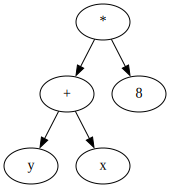

In [4]:
print("8*(y+x)")
from graphviz import Digraph
g1 = Digraph('ex1')
g1.node('*', label='*')
g1.node('+', label='+')
g1.node('8', label='8')
g1.node('y', label='y')
g1.node('x', label='x')
g1.edge('*','8')
g1.edge('*','+')
g1.edge('+', 'y')
g1.edge('+', 'x')
g1.render('ex1', format='png') # Uncomment if you want to save the figure
g1


8*y+x


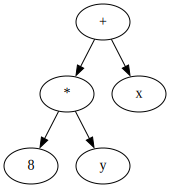

In [2]:
print("8*y+x")
g2 = Digraph('ex2')
g2.node('*', label='*')
g2.node('+', label='+')
g2.node('8', label='8')
g2.node('y', label='y')
g2.node('x', label='x')
g2.edge('+','*')
g2.edge('+','x')
g2.edge('*', '8')
g2.edge('*', 'y')
g2.render('ex2', format='png') # Uncomment if you want to save the figure
g2

In [5]:
# Super class for Expressions:

class Expr:
    pass

### Subclass of Expr for Constant e.g., 3

class Const(Expr):
    def __init__(self, val):
        self.val = val  
        
    def getVal(self):
        return self.val
    
    def __str__(self):
        return str(self.getVal())
    
    def eval(self, env):
        return self.getVal()

### Subclass of Expr for Variables e.g., x, y       
class Var(Expr):
    def __init__(self, name):
        self.name = name
        
    def getName(self):
        return self.name
        
    def __str__(self):
        return self.getName()
    
    def eval(self, env):
        return env[self.name]

### Subclass of Expr for Binary Operations: e.g., x, y       
class Times(Expr):
    def __init__(self, l, r):
        self.l = l
        self.r = r
        
    def getLeft(self):
        return self.l
    
    def getRight(self):
        return self.r
          
    def __str__(self):
        return "(" + str(self.getLeft()) + "*" + str(self.getRight()) + ")"
    
    def eval(self, env):
        return self.getLeft().eval(env)*self.getRight().eval(env)

class Plus(Expr):
    def __init__(self, l, r):
        self.l = l
        self.r = r
    def __str__(self):
        return "(" + str(self.l) + "+" + str(self.r) + ")"
    
    def getLeft(self):
        return self.l
    
    def getRight(self):
        return self.r
    
    def eval(self, env):
        print(f"Printing Eval {env}")
        return self.getLeft().eval(env) + self.getRight().eval(env)
        
### Let's print ex1: 8*(y + x)

ex1 = Times(Const(8), Plus(Var("y"),Var("x")))

### Let's print ex1: 3*y + x
ex2 = Plus(Times(Const(8), Var("y")), Var("x")) 

print(ex1)
print(ex2)

(8*(y+x))
((8*y)+x)


In [6]:
# Evaluate The Expressions
vals = {"x":5, "y":10}
ex1.eval(vals)


Printing Eval {'x': 5, 'y': 10}


120

# Basics of PyTorch

#### Tensors and Properties

In [11]:
import torch

In [12]:
import numpy as np

In [13]:
# Set seed for reproducibility
np.random.seed(0)


# Predefine Matrix of shape=(2,3)
np.array([[4, 5, 6], [1, 7, 8]])

# Zero Matrix of shape=(3,3)
np.zeros((3,3))

# Identity Matrix of shape=(2,2)
np.eye(2)

# Random Matrix of shape=(3,3)
np.random.rand(3,3)

array([[0.5488135 , 0.71518937, 0.60276338],
       [0.54488318, 0.4236548 , 0.64589411],
       [0.43758721, 0.891773  , 0.96366276]])

In [14]:
# Set seed for reproducibility
torch.manual_seed(0)


# Predefine Matrix of shape=(2,3)
torch.tensor([[4, 5, 6], [1, 7, 8]])

# Zero Matrix of shape=(3,3)
torch.zeros((3,3))

# Identity Matrix of shape=(2,2)
torch.eye(2)

# Random Matrix of shape=(3,3)
torch.rand(3,3)

tensor([[0.4963, 0.7682, 0.0885],
        [0.1320, 0.3074, 0.6341],
        [0.4901, 0.8964, 0.4556]])

In [14]:
##### Dimension operations on Tensors.

# Scalar
s = torch.tensor(1.)
print(f"Sclaer x: {s}")

# Check dimension of Scalar
d = s.dim()
print(f"Dimension of vector is: {d}")

# Vectors
v = torch.tensor([1., 2., 3.])
print(f"Vector v: {v}")
#Check dimension of Vectors
d = v.dim()
print(f"Dimension of vector is: {d}")


# Matrix
m = torch.tensor([[1., 2., 3.],[4., 5., 6.]])
d = m.dim()
print(f"Dimension of matrix is: {d}")


# Tensor
# Matrix
m = torch.tensor([[[1., 2., 3.],[4., 5., 6.], [1., 2., 3.],[4., 5., 6.]]])
d = m.dim()
print(f"Dimension of Tensor is: {d}")




Sclaer x: 1.0
Dimension of vector is: 0
Vector v: tensor([1., 2., 3.])
Dimension of vector is: 1
Dimension of matrix is: 2
Dimension of Tensor is: 3


#### Methods on Tensors

###### Sum

In [15]:
# Set seed for reproducibility
torch.manual_seed(0)


# Random Matrix of shape=(3,3)
x = torch.rand(3,2)
print(f"x: {x}")

xsum = torch.sum(x, dim=1)
print(f"xsum using mthod1: {xsum}")

x.sum(dim=1)
print(f"xsum using mthod2: {xsum}")



x: tensor([[0.4963, 0.7682],
        [0.0885, 0.1320],
        [0.3074, 0.6341]])
xsum using mthod1: tensor([1.2645, 0.2205, 0.9415])
xsum using mthod2: tensor([1.2645, 0.2205, 0.9415])


###### Reshape : `view` and  `reshape`  methods

In [16]:
#### Inplace Reshaping

# A vector of length N=10
x = torch.tensor([1,2,3,4,5,6,7,8,9,10, 11, 12])
# Reshape in amatrix of shape= (2,5)
x.view(3,4)

# Reshape with unspecified number of rows and 4 column
x.view(-1, 4)

#### Reshaping via copying

# A vector of length N=10
x = torch.tensor([1,2,3,4,5,6,7,8,9,10,11,12])

# Reshape in amatrix of shape= (2,5)
y3 = x.reshape(3,4)

# Reshape with unspecified number of rows and 4 column
y4 = x.reshape(-1,4)

###### Computing Norm of a vector using `norm` method

$$
L_p~\text{norm}:
||{\mathbf{x}}||_p = \left(\sum_i |x_i|^p\right)^{\frac{1}{p}}
$$


$$
L^1~\text{norm}:
|| {\mathbf{x}} ||_1 = |x_1| + |x_2| + \ldots + |x_n|
$$

$$
L^2~\text{norm}:
|| {\mathbf{x}} ||_2 = \sqrt{x_1^2 + x_2^2 + \ldots + x_n^2}
$$



In [17]:
torch.manual_seed(0)
x = torch.rand(3)
x.norm(p=1)
x.norm(p=2)
print(f"L1 Norm of x is:{x.norm(p=1)}")
print(f"L2 Norm of x is:{x.norm(p=2)}")

L1 Norm of x is:1.3529558181762695
L2 Norm of x is:0.9188381433486938


###### Computing Norm of a vector without using the method

In [18]:
n1 = torch.sum(torch.abs(x))
print(f"L1 norm: is: {n1}")
n2 = torch.sqrt(torch.sum(x**2))
print(f"L2 norm: is: {n2}")

## Or Calling method directly on the data structures
n1 = x.abs().sum()
print(f"L1 norm: is: {n1}")
n2 = (x**2).sum().sqrt() 
print(f"L2 norm: is: {n2}")

L1 norm: is: 1.3529558181762695
L2 norm: is: 0.9188381433486938
L1 norm: is: 1.3529558181762695
L2 norm: is: 0.9188381433486938


### Tensors on GPU

In [19]:
import torch
torch.cuda.is_available()  # Check if we can use GPUs

False

In [20]:
x = torch.Tensor([[4,5,8], [3,8,9]])

### Mapping tensors to GPU

In [21]:
dev_cpu = torch.device("cpu")
dev_gpu = torch.device("cuda:0")

# Send Tensor to GPU
x.to(dev_cpu)


tensor([[4., 5., 8.],
        [3., 8., 9.]])

In [22]:
# At the start of your code
device = torch.device("cpu" if not torch.cuda.is_available() else "cuda")

# For later dispatch
x.to(device)

tensor([[4., 5., 8.],
        [3., 8., 9.]])

### NumPy ----> PyTorch ----> NumPy

In [23]:
import numpy as np

X = np.random.random((4,4))
#print(X)

In [24]:
# NumPy to PyTorch
Y = torch.from_numpy(X)
#print(Y)

In [70]:
# PyTorch ---> NumPy

In [92]:
X = Y.numpy()
#print(X)

### Timing GPU Operations

In [25]:
A = torch.rand(100, 400, 400)
#B = A.cuda()
A.size()

torch.Size([100, 400, 400])

In [47]:
%timeit -n 3 torch.bmm(A, A)
%timeit -n 3 torch.bmm(B, B)

RuntimeError: Expected batch2_sizes[0] == bs && batch2_sizes[1] == contraction_size to be true, but got false.  (Could this error message be improved?  If so, please report an enhancement request to PyTorch.)


$$
a = 8\\
b = 6\\
c = a + b\\
d = a * c\\
$$
Compute $ \frac{\partial d}{\partial a}$
High School Approach:

1. $\qquad d = a*c$

2. $\qquad  \frac{\partial d}{\partial a} = c * \frac{\partial a}{\partial a} + a * \frac{\partial c}{\partial a}$

3. $\qquad  \frac{\partial d}{\partial a} = c + a* \frac{\partial c}{\partial a}$
4. $\qquad  \frac{\partial d}{\partial a} = (a + b) + a*\frac{\partial a}{\partial a} + a * \frac{\partial b}{\partial a} $
5. $\qquad  \frac{\partial d}{\partial a} = a + b + a*(1 + 0)$
6. $\qquad  \frac{\partial d}{\partial a} = 2a + b $
7. $\qquad  \frac{\partial d}{\partial a} = 2*8+ 6 = 22 $

In case if you need to $\frac{\partial d}{\partial b}$, steps 1-7 need to carried out again.
"

# Automatic Differentiation

In [15]:
from collections import defaultdict
class Var:
    def __init__(self, val, local_grad=()):
        self.val = val
        self.local_grad = local_grad
         
    def __add__(self, other):
        y = self.val + other.val
        local_grad = ((self, 1), (other, 1))       
        return Var(y, local_grad)
    
    def __mul__(self, other):
        y = self.val*other.val
        local_grad = ((self, other.val), (other, self.val))
        return Var(y, local_grad)
    
    def __sub__(self, other):
        y = self.val - other.val
        local_grad = ((self, 1), (other, -1))       
        return Var(y, local_grad)
    
    
def get_grads(var):
    grad = defaultdict(lambda:0)
    
    def compute_grad(var, path):
        for child_var, loc_grad in var.local_grad:
            val_path_child = path * loc_grad
            grad[child_var] += val_path_child
            compute_grad(child_var,val_path_child)   
    
    compute_grad(var, path=1)
    
    return grad
    
    
    
    
   
        
        

In [20]:
a = Var(8)
b = Var(6)

## AD for Addition 

c = a + b
d = a*c

grad = get_grads(d)

print(f"AD of addition: {grad[a]}")

## AD for Subtraction 

c = a - b
d = a*c

grad = get_grads(d)

print(f"AD of subtraction: {grad[a]}")



AD of addition: 22
AD of subtraction: 10


# Einstein Summation

In [29]:
import torch
torch.manual_seed(1234)

In [30]:
A=torch.randint(3, 10, (3, 4))
B=torch.randint(3, 10, (4, 3))
A



tensor([[9, 7, 3, 8],
        [3, 4, 9, 7],
        [3, 5, 5, 6]])

In [31]:
B


tensor([[4, 8, 3],
        [6, 7, 4],
        [9, 8, 6],
        [4, 5, 8]])

In [32]:
torch.matmul(A, B)

tensor([[137, 185, 137],
        [145, 159, 135],
        [111, 129, 107]])

In [36]:
C= torch.einsum("ij, jk -> ik", A, B)
C

tensor([[137, 185, 137],
        [145, 159, 135],
        [111, 129, 107]])

In [37]:
torch.manual_seed(1234)
A=torch.randint(3, 10, (3, 4, 3))
B=torch.randint(3, 10, (3, 3, 4))
A



tensor([[[9, 7, 3],
         [8, 3, 4],
         [9, 7, 3],
         [5, 5, 6]],

        [[4, 8, 3],
         [6, 7, 4],
         [9, 8, 6],
         [4, 5, 8]],

        [[7, 8, 8],
         [9, 6, 4],
         [7, 4, 5],
         [7, 7, 6]]])

In [38]:
B

tensor([[[7, 5, 4, 4],
         [5, 6, 4, 6],
         [3, 7, 3, 8]],

        [[8, 6, 8, 6],
         [7, 9, 8, 4],
         [8, 4, 8, 5]],

        [[5, 9, 7, 4],
         [5, 5, 7, 3],
         [8, 7, 3, 7]]])

In [39]:
C = torch.einsum("bij, bjk->bik", A,B)
C

tensor([[[107, 108,  73, 102],
         [ 83,  86,  56,  82],
         [107, 108,  73, 102],
         [ 78,  97,  58,  98]],

        [[112, 108, 120,  71],
         [129, 115, 136,  84],
         [176, 150, 184, 116],
         [131, 101, 136,  84]],

        [[139, 159, 129, 108],
         [107, 139, 117,  82],
         [ 95, 118,  92,  75],
         [118, 140, 116,  91]]])

In [40]:
Ct = torch.matmul(A, B)

In [41]:
Ct


tensor([[[107, 108,  73, 102],
         [ 83,  86,  56,  82],
         [107, 108,  73, 102],
         [ 78,  97,  58,  98]],

        [[112, 108, 120,  71],
         [129, 115, 136,  84],
         [176, 150, 184, 116],
         [131, 101, 136,  84]],

        [[139, 159, 129, 108],
         [107, 139, 117,  82],
         [ 95, 118,  92,  75],
         [118, 140, 116,  91]]])

# Function Approximations

### Parabolic Function

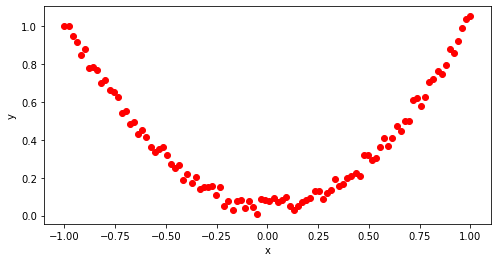

In [42]:
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
from torch.optim import Adam, LBFGS, SGD
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
%matplotlib inline


torch.manual_seed(1234) 

### Input data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) 
# torch.unsqueeze: Returns a new tensor 
# with a dimension of size one inserted at the specified position.
y = torch.square(x)
# Add Random Noise
y = y + 0.1*torch.rand(y.size())

# Plot the data
plt.figure(figsize=(8,4))

x_plot, y_plot = x.numpy(), y.numpy()
plt.scatter(x_plot, y_plot, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show("Data for Regression Analysis")
plt.show()







Doing Iterations: 0 and Loss: 0.2131779044866562
Doing Iterations: 50 and Loss: 0.000715926755219698
Doing Iterations: 100 and Loss: 0.0006421952857635915
Doing Iterations: 150 and Loss: 0.0006263998220674694


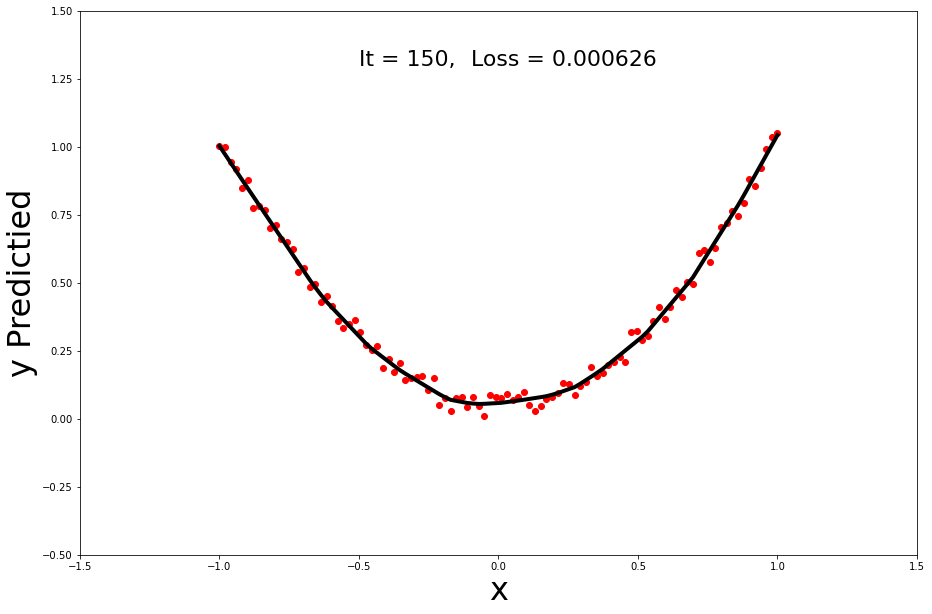

In [44]:
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
from torch.optim import Adam, LBFGS, SGD
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
%matplotlib inline


torch.manual_seed(1234) 

### Input data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) 
# torch.unsqueeze: Returns a new tensor 
# with a dimension of size one inserted at the specified position.
y = torch.square(x)
# Add Random Noise
y = y + 0.1*torch.rand(y.size())



# Convert x and y to tracked variables
x = Variable(x)
y = Variable(y)

Net = torch.nn.Sequential(
      torch.nn.Linear(1, 100),
      torch.nn.LeakyReLU(),
      torch.nn.Linear(100, 1))

optimizer = torch.optim.Adam(Net.parameters(), lr = 0.01)
loss_function = torch.nn.MSELoss()

image_list = []
Niter = 150 + 1

fig, ax = plt.subplots(figsize=(15,10))

for it in range(Niter):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()    # Zero Out the gradient
    optimizer.step()
    if it % 50 == 0:
        print(f"Doing Iterations: {it} and Loss: {loss}")
    plt.cla()
    ax.set_xlabel('x', fontsize=32)
    ax.set_ylabel('y Predictied', fontsize=32)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.scatter(x_plot, y_plot, color = "red")
    ax.plot(x_plot, y_pred.data.numpy(), 'k-', lw=4)
    ax.text(-0.5, 1.3, 'It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
    ax.text(-0.1, 1.3, 'Loss = %.6f' % loss.data.numpy(),
            fontdict={'size': 22, 'color':  'black'})

    fig.canvas.draw()      
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    image_list.append(image)
    
   

imageio.mimsave('./Parabolic_regression_1.gif', image_list, fps=5)
    



### Sin Function

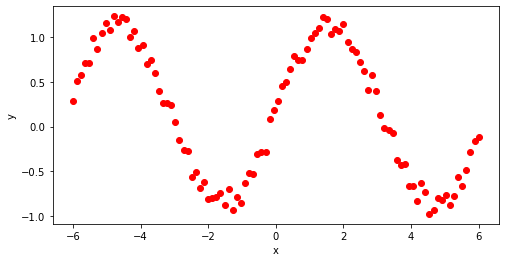

In [45]:
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(1234) 

### Input data
x = torch.unsqueeze(torch.linspace(-6, 6, 100), dim=1) 
# torch.unsqueeze: Returns a new tensor 
# with a dimension of size one inserted at the specified position.
y = torch.sin(x)
# Add Random Noise
y = y + 0.30*torch.rand(y.size())

# Plot the data
plt.figure(figsize=(8,4))

x_plot, y_plot = x.numpy(), y.numpy()
plt.scatter(x_plot, y_plot, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show("Data for Regression Analysis")
plt.show()


Doing Iterations: 0 and Loss: 0.8034062385559082
Doing Iterations: 50 and Loss: 0.11373567581176758
Doing Iterations: 100 and Loss: 0.10786443948745728
Doing Iterations: 150 and Loss: 0.1027265340089798
Doing Iterations: 200 and Loss: 0.09231911599636078
Doing Iterations: 250 and Loss: 0.0758381336927414
Doing Iterations: 300 and Loss: 0.05385994538664818
Doing Iterations: 350 and Loss: 0.0337362065911293
Doing Iterations: 400 and Loss: 0.019557828083634377
Doing Iterations: 450 and Loss: 0.014799895696341991
Doing Iterations: 500 and Loss: 0.012736027128994465
Doing Iterations: 550 and Loss: 0.0102080674842
Doing Iterations: 600 and Loss: 0.009226702153682709
Doing Iterations: 650 and Loss: 0.008671664632856846
Doing Iterations: 700 and Loss: 0.007980658672749996
Doing Iterations: 750 and Loss: 0.007601229008287191
Doing Iterations: 800 and Loss: 0.007699568290263414
Doing Iterations: 850 and Loss: 0.0173762496560812
Doing Iterations: 900 and Loss: 0.0065982164815068245
Doing Iteratio

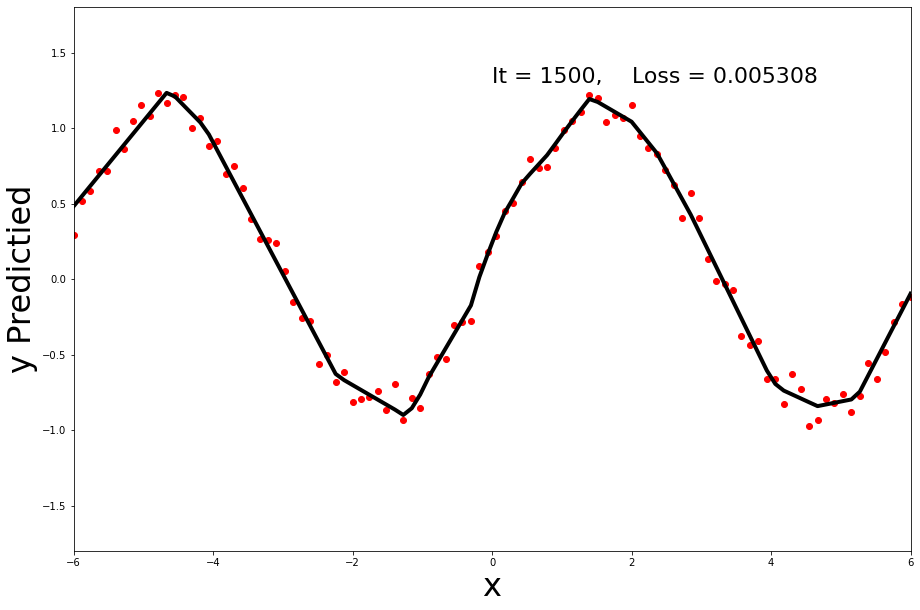

In [46]:
# Convert x and y to tracked variables
x = Variable(x)
y = Variable(y)

Net = torch.nn.Sequential(
      torch.nn.Linear(1, 100),
      torch.nn.LeakyReLU(),
      torch.nn.Linear(100, 1))

optimizer = torch.optim.Adam(Net.parameters(), lr = 0.01)
loss_function = torch.nn.MSELoss()

image_list = []
Niter = 1500 + 1

fig, ax = plt.subplots(figsize=(15,10))

for it in range(Niter):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)  # Notice the order: NN Pred first and then actual value
    optimizer.zero_grad()    # Zero Out the gradient
    loss.backward()
    optimizer.step()
    if it % 50 == 0:
        print(f"Doing Iterations: {it} and Loss: {loss}")
    plt.cla()
    ax.set_xlabel('x', fontsize=32)
    ax.set_ylabel('y Predictied', fontsize=32)
    ax.set_xlim(-6, 6)
    ax.set_ylim(-1.8, 1.8)
    ax.scatter(x_plot, y_plot, color = "red")
    ax.plot(x_plot, y_pred.data.numpy(), 'k-', lw=4)
    ax.text(0, 1.3, 'It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
    ax.text(2, 1.3, 'Loss = %.6f' % loss.data.numpy(),
            fontdict={'size': 22, 'color':  'black'})

    fig.canvas.draw()      
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    image_list.append(image)
    
   

imageio.mimsave('./Sin_Regression_2.gif', image_list, fps=20)

In [7]:
!pip install deepxde

     |████████████████████████████████| 117 kB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 100 kB 12.6 MB/s ta 0:00:01


Deepxde backend not selected or invalid. Assuming tensorflow.compat.v1 for now.
Using backend: tensorflow.compat.v1



Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDEBACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch (all lowercase)
Instructions for updating:
non-resource variables are not supported in the long term

Compiling model...
Building feed-forward neural network...
'build' took 0.040173 s



/Users/raj/opt/anaconda3/lib/python3.8/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+37=37. 
  warnings.warn("The balance properties of Sobol' points require "
/Users/raj/opt/anaconda3/lib/python3.8/site-packages/keras/legacy_tf_layers/core.py:236: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/raj/opt/anaconda3/lib/python3.8/site-packages/keras/engine/base_layer_v1.py:1676: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


'compile' took 0.229847 s

Initializing variables...
Training model...

Step      Train loss                                  Test loss                                   Test metric   
0         [2.58e-02, 4.51e-01, 0.00e+00, 1.00e+00]    [2.39e-02, 4.63e-01, 0.00e+00, 1.00e+00]    [1.26e+00]    
1000      [8.33e-03, 6.78e-03, 1.16e-08, 3.03e-04]    [9.17e-03, 6.33e-03, 1.16e-08, 3.03e-04]    [7.55e-01]    
2000      [4.32e-03, 3.64e-03, 3.58e-07, 9.06e-05]    [4.78e-03, 3.61e-03, 3.58e-07, 9.06e-05]    [5.34e-01]    
3000      [2.00e-03, 2.56e-03, 7.79e-09, 3.71e-05]    [2.23e-03, 2.42e-03, 7.79e-09, 3.71e-05]    [3.68e-01]    
4000      [1.10e-03, 1.64e-03, 1.70e-06, 2.40e-05]    [1.31e-03, 1.47e-03, 1.70e-06, 2.40e-05]    [2.55e-01]    
5000      [6.85e-04, 9.36e-04, 8.06e-07, 8.75e-06]    [7.46e-04, 7.61e-04, 8.06e-07, 8.75e-06]    [1.83e-01]    
6000      [2.02e-03, 7.48e-04, 4.99e-05, 7.41e-05]    [1.95e-03, 5.00e-04, 4.99e-05, 7.41e-05]    [1.36e-01]    
7000      [2.13e-04, 2.1

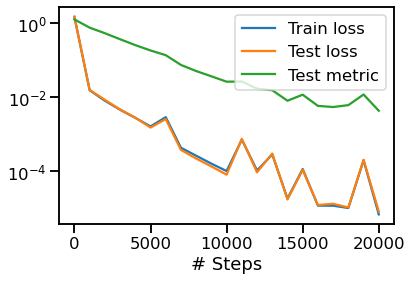

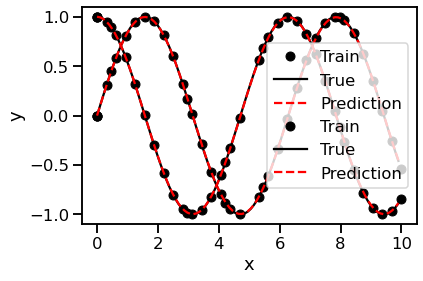

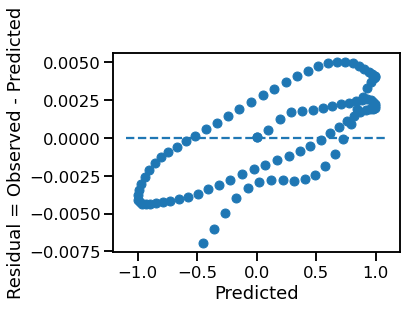

In [8]:
import deepxde as dde
import numpy as np
from deepxde.backend import tf



def ode_system(x, y):
    """ODE system.
    dy1/dx = y2
    dy2/dx = -y1
    """
    y1, y2 = y[:, 0:1], y[:, 1:]
    dy1_x = dde.grad.jacobian(y, x, i=0)
    dy2_x = dde.grad.jacobian(y, x, i=1)
    return [dy1_x - y2, dy2_x + y1]


def boundary(_, on_initial):
    return on_initial


def func(x):
    """
    y1 = sin(x)
    y2 = cos(x)
    """
    return np.hstack((np.sin(x), np.cos(x)))


geom = dde.geometry.TimeDomain(0, 10)
ic1 = dde.IC(geom, np.sin, boundary, component=0)
ic2 = dde.IC(geom, np.cos, boundary, component=1)
data = dde.data.PDE(geom, ode_system, [ic1, ic2], 35, 2, solution=func, num_test=100)

layer_size = [1] + [50] * 3 + [2]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.maps.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(epochs=20000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)